In [1]:
import tensorflow as tf
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel boot']

0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankel boot

In [2]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


데이터 전처리

: 모델 훈련 전, 정확한 모델링을 위한 데이터셋 전처리

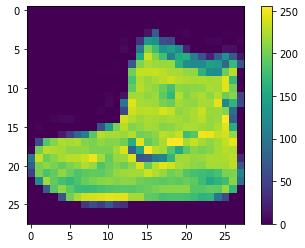

In [3]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0])
plt.grid(False)
plt.colorbar()
plt.show()

Training/Test set 모두 255로 나누어, 범위값을 0~1 사이로 표준화

In [4]:
train_images = train_images / 255
test_images = test_images / 255

데이터 포맷 확인을 위해, Training set에서 처음 25개 이미지 및 클래스를 출력

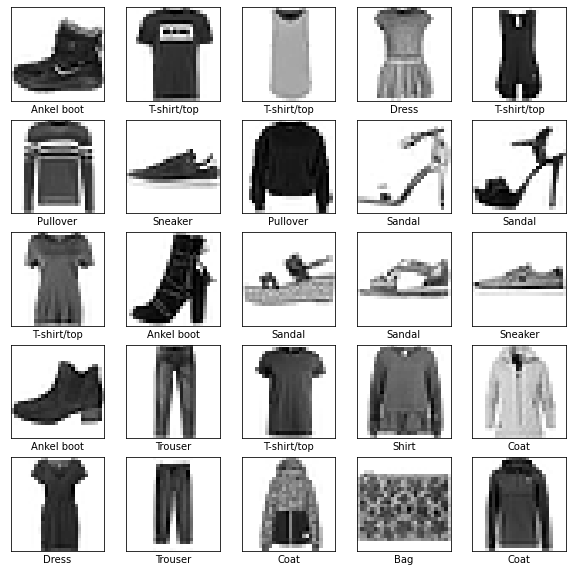

In [5]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
#keras.layers.Flatten - 이미지에 있는 픽셀의 행을 펼쳐서 일렬로 배열(28*28=784 픽셀의 1차원 배열 변환)
#keras.layers.Dense - 마지막 층은 10개 노드의 Softmax 층으로 10개 클라스 중 하나에 속할 확률을 출력(전체 합=1)

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('정확도 : ', test_acc*100)

#예측(Prediction) 실행
#: 학습된 모델을 사용하여, 이미지에 대한 예측이 가능
#: Test set에 있는 각 이미지의 Label 예측

predictions = model.predict(test_images)    
print(predictions[0])
np.argmax(predictions[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 1s 487us/step - loss: 0.4985 - accuracy: 0.8236
Epoch 2/5
1875/1875 [==============================] - 1s 487us/step - loss: 0.3762 - accuracy: 0.8643
Epoch 3/5
1875/1875 [==============================] - 1s 480us/step - loss: 0.3395 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 1s 482us/step - loss: 0.3136 - accuracy: 0.8851
Epoch 5/5
1875/1875 [==============================] - 1s 530us/step - loss: 0.2940 - accuracy: 0.8915
313/313 - 0s - loss: 0.3573 - accuracy: 0.8726
정확도 :  87.26000189781189
[2.4573657e-05 9.4840402e-08 1.7678704e-07 6.6015588e-08 5.8071009e-06
 2.6946692e-03 1.7602209e-05 1.6817305e-02 8.0865444e-05 9.8035884e-01]
9


In [7]:
# 이미지 클래스를 예측하여 그래프/신뢰도를 출력하는 함수 정의

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array), 
                                  class_names[true_label]), 
                                  color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

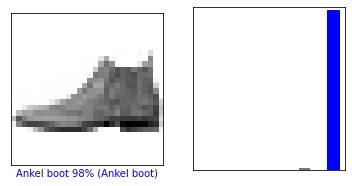

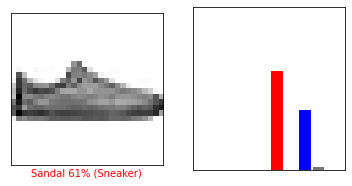

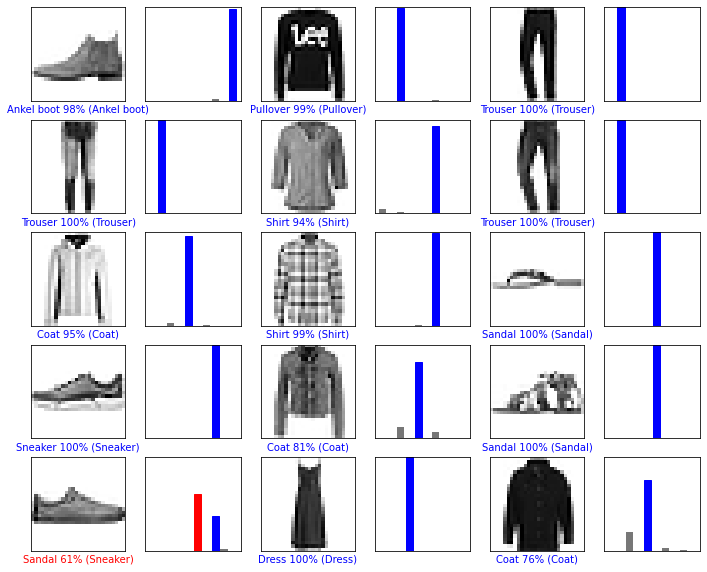

In [8]:
# 올바른 예측은 파란색, 잘못 예측은 빨강색

# 숫자는 예측 레이블의 신뢰도 퍼센트

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

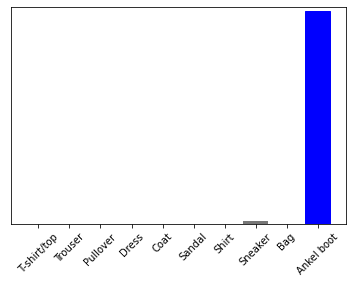

In [9]:
# 한 개의 이미지 예측을 테스트하기 위해, Test set에서 이미지 선택
img = test_images[0]

# tf.keras 모델은 한 개의 이미지만 사용할 때에도 배치 추가
img = (np.expand_dims(img,0))

# 입력된 이미지에 대한 예측 실행
predictions_single = model.predict(img)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)